In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from scipy import stats
from tqdm import tqdm
from sensitivity_tests import *

In [2]:
DATA_CSV_NAME = "sensitivity_dataset_fixed.csv"

In [3]:
data = pd.read_csv(DATA_CSV_NAME)[["D","P", "p_lowerbound"]]

In [4]:
data = data.loc[data["p_lowerbound"]>2]
len(data)

1101

In [5]:
data.head()

,D,P,p_lowerbound
0,[[0. 2. 1. 1. 0. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1....,"[(5, 1, 6, 11, 3, 4, 13, 8, 14, 7, 10, 12, 2, ...",10
1,[[0. 2. 2. 2. 1. 2. 2. 0. 0. 2. 1. 2. 0. 0. 1....,"[(1, 8, 12, 9, 4, 2, 6, 13, 11, 10, 14, 3, 7, ...",5
2,[[0. 3. 1. 1. 1. 1. 1. 1. 0. 3. 0. 2. 2. 0. 0....,"[(1, 13, 6, 2, 12, 8, 11, 9, 10, 14, 3, 7, 5, ...",5
3,[[0. 3. 2. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1....,"[(8, 6, 5, 3, 13, 9, 7, 14, 10, 4, 12, 11, 0, ...",6
6,[[0. 2. 2. 2. 1. 3. 1. 2. 3. 2. 2. 2. 2. 0. 2....,"[(6, 9, 13, 0, 12, 10, 3, 2, 1, 11, 5, 7, 8, 4...",4


In [6]:
def read_P(string):
    return json.loads(string.replace("(", "[").replace(")", "]"))

# Assumes integer D
def read_D(string):
    return np.array(json.loads(string.replace("\n ", ",").replace(". ", ", ").replace(".]", "]")))

In [7]:
massey = MasseyRankingAlgorithm()
colley = ColleyRankingAlgorithm()

massey_max_taus = []
massey_mean_taus = []
colley_max_taus = []
colley_mean_taus = []
for idx in tqdm(range(len(data))):
    D = read_D(data["D"].iloc[idx])
    P = read_P(data["P"].iloc[idx])
    massey_ranking = massey.rank(D)
    colley_ranking = colley.rank(D)
    massey_taus = []
    colley_taus = []
    for opt_ranking in P:
        m_tau, _ = stats.kendalltau(opt_ranking, massey_ranking)
        massey_taus.append(m_tau)
        c_tau, _ = stats.kendalltau(opt_ranking, colley_ranking)
        colley_taus.append(c_tau)
    massey_max_taus.append(np.max(massey_taus))
    massey_mean_taus.append(np.mean(massey_taus))
    colley_max_taus.append(np.max(colley_taus))
    colley_mean_taus.append(np.mean(colley_taus))

data["massey_max_tau"] = massey_max_taus
data["colley_max_tau"] = colley_max_taus
data["massey_mean_tau"] = massey_mean_taus
data["colley_mean_tau"] = colley_mean_taus

100%|██████████| 1101/1101 [00:17<00:00, 62.37it/s]


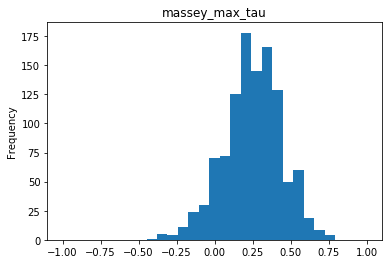

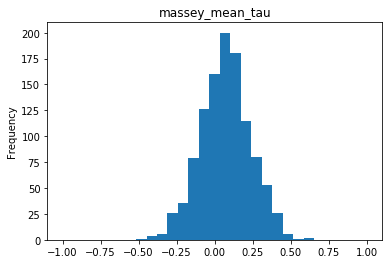

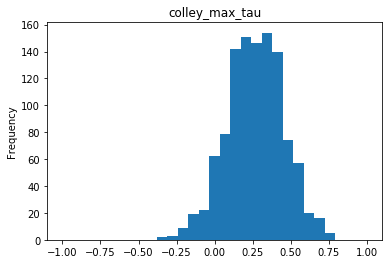

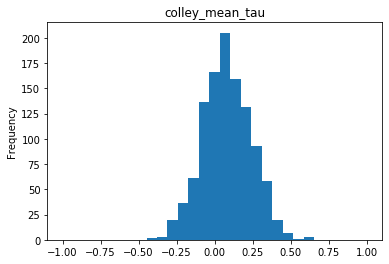

In [8]:
for col in ["massey_max_tau", "massey_mean_tau", "colley_max_tau", "colley_mean_tau"]:
    data[col].plot.hist(title=col, bins=np.linspace(start=-1.0, stop=1.0, num=30))
    plt.show()

In [9]:
worst_massey_idx = data["massey_max_tau"].idxmin()
worst_massey_idx, data["massey_max_tau"].loc[worst_massey_idx]

(935, -0.3904761904761905)

In [19]:
worst_massey_D = read_D(data.loc[worst_massey_idx]["D"])
worst_massey_P = read_P(data.loc[worst_massey_idx]["P"])
worst_massey_ranking = massey.rank(worst_massey_D)
worst_massey_P, worst_massey_ranking

taus = []
for opt_rank in worst_massey_P:
    tau, _ = stats.kendalltau(worst_massey_ranking, opt_rank)
    taus.append(tau)
closest_idx = np.array(taus).argmax()
worst_massey_P[closest_idx], worst_massey_ranking

([13, 6, 1, 7, 4, 3, 14, 5, 11, 0, 9, 10, 8, 12, 2],
 [1, 6, 13, 3, 4, 7, 0, 5, 12, 10, 11, 8, 9, 2, 14])

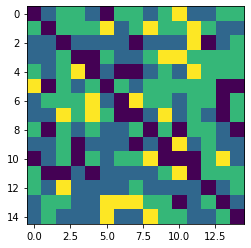

In [20]:
plt.imshow(worst_massey_D)

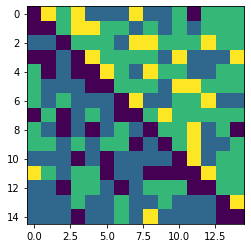

In [21]:
r = worst_massey_P[closest_idx]
plt.imshow(worst_massey_D[r,:][:,r])

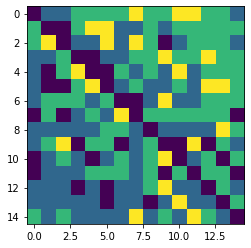

In [22]:
r = worst_massey_ranking
plt.imshow(worst_massey_D[r,:][:,r])

In [24]:
worst_colley_idx = data["colley_max_tau"].idxmin()
worst_colley_idx, data["colley_max_tau"].loc[worst_colley_idx]

(302, -0.3523809523809524)

In [25]:
worst_colley_D = read_D(data.loc[worst_colley_idx]["D"])
worst_colley_P = read_P(data.loc[worst_colley_idx]["P"])
worst_colley_ranking = colley.rank(worst_colley_D)
worst_colley_P, worst_colley_ranking

taus = []
for opt_rank in worst_colley_P:
    tau, _ = stats.kendalltau(worst_colley_ranking, opt_rank)
    taus.append(tau)
closest_idx = np.array(taus).argmax()
worst_colley_P[closest_idx], worst_colley_ranking

([5, 11, 8, 9, 10, 14, 0, 1, 3, 4, 13, 2, 7, 12, 6],
 [10, 9, 5, 11, 8, 1, 14, 13, 7, 6, 4, 2, 12, 0, 3])

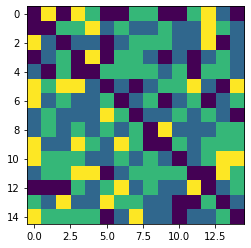

In [26]:
plt.imshow(worst_colley_D)

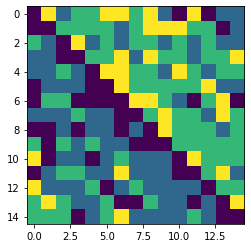

In [27]:
r = worst_colley_P[closest_idx]
plt.imshow(worst_colley_D[r,:][:,r])

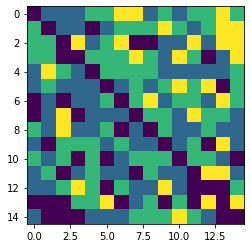

In [28]:
r = worst_colley_ranking
plt.imshow(worst_colley_D[r,:][:,r])